## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
# full = pd.read_csv('./data/Seasons_Stats_full_1950.csv', index_col=0)

Data from here: https://www.kaggle.com/drgilermo/nba-players-stats 

In [3]:
# full.head()

In [4]:
# full.shape

In [5]:
# data = full.query("Year > 1988")
# data.to_csv('./data/1989.csv', index=False)

In [6]:
data = pd.read_csv('./data/1989.csv')
data.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1989.0,Kareem Abdul-Jabbar*,C,41.0,LAL,74.0,74.0,1695.0,12.9,0.511,...,0.739,103.0,231.0,334.0,74.0,38.0,85.0,95.0,196.0,748.0
1,1989.0,Mark Acres,C,26.0,BOS,62.0,0.0,632.0,8.2,0.507,...,0.542,59.0,87.0,146.0,19.0,19.0,6.0,23.0,94.0,137.0
2,1989.0,Michael Adams,PG,26.0,DEN,77.0,77.0,2787.0,17.5,0.567,...,0.819,71.0,212.0,283.0,490.0,166.0,11.0,180.0,149.0,1424.0
3,1989.0,Mark Aguirre,SF,29.0,TOT,80.0,76.0,2597.0,16.4,0.524,...,0.733,146.0,240.0,386.0,278.0,45.0,36.0,208.0,229.0,1511.0
4,1989.0,Mark Aguirre,SF,29.0,DAL,44.0,44.0,1529.0,17.3,0.509,...,0.730,90.0,145.0,235.0,189.0,29.0,29.0,140.0,128.0,953.0


### Scrape awards data to connect.

*Note:* Scrapped this section due to the table here being particularly unreasonable in its stupidity: https://www.basketball-reference.com//awards/all_league.html

In [7]:

# import requests
# from bs4 import BeautifulSoup

# url = 'https://www.basketball-reference.com/awards/all_league.html'
# res = requests.get(url)
# res.status_code

# ##
# # soup.find_all('td', class_=lambda x: x != 'foo')

# # soup = BeautifulSoup(res.content, 'lxml')

# # allnba_players = []
# # table = soup.find('table', {'id':'awards_all_league'})

# # for row in table.find('tbody').find_all('tr', class_=lambda x: x != 'thead'):
# #     award_dict = {}
# #     award_dict['year'] = row.find('th').find('a').text.strip()
    
# #     for entry in row.find_all('td', {'class':'left'})[1:]:
# #         award_dict['player-pos'] = entry.text.strip()
    
# #     allnba_players.append(award_dict)

### Got my awards data a different way.

In [8]:
awards = pd.read_csv('./data/allnba_awards.txt')
awards.head()

,Season,Lg,Tm,Player1,Player2,Player3,Player4,Player5
0,2017-18,NBA,1st,Anthony Davis C,LeBron James F,Kevin Durant F,Damian Lillard G,James Harden G
1,2017-18,NBA,2nd,Joel Embiid C,Giannis Antetokounmpo F,LaMarcus Aldridge F,Russell Westbrook G,DeMar DeRozan G
2,2017-18,NBA,3rd,Karl-Anthony Towns C,Jimmy Butler F,Paul George F,Stephen Curry G,Victor Oladipo G
3,2016-17,NBA,1st,Anthony Davis C,LeBron James F,Kawhi Leonard F,James Harden G,Russell Westbrook G
4,2016-17,NBA,2nd,Rudy Gobert C,Giannis Antetokounmpo F,Kevin Durant F,Stephen Curry G,Isaiah Thomas G


In [9]:
awards[awards['Season'] == '2016-17']

,Season,Lg,Tm,Player1,Player2,Player3,Player4,Player5
3,2016-17,NBA,1st,Anthony Davis C,LeBron James F,Kawhi Leonard F,James Harden G,Russell Westbrook G
4,2016-17,NBA,2nd,Rudy Gobert C,Giannis Antetokounmpo F,Kevin Durant F,Stephen Curry G,Isaiah Thomas G
5,2016-17,NBA,3rd,DeAndre Jordan C,Draymond Green F,Jimmy Butler F,John Wall G,DeMar DeRozan G


In [10]:
data[data['Player'] == 'Stephen Curry']

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
10913,2010.0,Stephen Curry,PG,21.0,GSW,80.0,77.0,2896.0,16.3,0.568,...,0.885,48.0,308.0,356.0,472.0,152.0,19.0,243.0,252.0,1399.0
11524,2011.0,Stephen Curry,PG,22.0,GSW,74.0,74.0,2489.0,19.4,0.595,...,0.934,52.0,234.0,286.0,432.0,109.0,20.0,226.0,233.0,1373.0
12105,2012.0,Stephen Curry,PG,23.0,GSW,26.0,23.0,732.0,21.2,0.605,...,0.809,15.0,73.0,88.0,138.0,39.0,8.0,65.0,62.0,383.0
12666,2013.0,Stephen Curry,PG,24.0,GSW,78.0,78.0,2983.0,21.3,0.589,...,0.900,59.0,255.0,314.0,539.0,126.0,12.0,240.0,198.0,1786.0
13269,2014.0,Stephen Curry,PG,25.0,GSW,78.0,78.0,2846.0,24.1,0.610,...,0.885,46.0,288.0,334.0,666.0,128.0,14.0,294.0,194.0,1873.0
13866,2015.0,Stephen Curry,PG,26.0,GSW,80.0,80.0,2613.0,28.0,0.638,...,0.914,56.0,285.0,341.0,619.0,163.0,16.0,249.0,158.0,1900.0
14498,2016.0,Stephen Curry,PG,27.0,GSW,79.0,79.0,2700.0,31.5,0.669,...,0.908,68.0,362.0,430.0,527.0,169.0,15.0,262.0,161.0,2375.0
15080,2017.0,Stephen Curry,PG,28.0,GSW,79.0,79.0,2638.0,24.6,0.624,...,0.898,61.0,292.0,353.0,523.0,143.0,17.0,239.0,183.0,1999.0


In [11]:
mask = (data['Year']==2017) & (data['Player'] == 'Stephen Curry')
data[mask]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
15080,2017.0,Stephen Curry,PG,28.0,GSW,79.0,79.0,2638.0,24.6,0.624,...,0.898,61.0,292.0,353.0,523.0,143.0,17.0,239.0,183.0,1999.0


#### Some Notes on next steps:
1. Make everything lowercase. everywhere.
2. Only take "TOT" from players who played more than one team during a season, dropping the individual team rows.
    - Side question, for me: has anyone ever played for more than one team in a season (trade?) and also gotten All-NBA???
3. Transform some info in the `awards` df:
    - Season-year to latest number (e.g. 2017-18 to 2018)
    - One row per year-player 
    - Separate out position: 
    - Ex: final DF should look like: `cols = ['year', 'player', 'position', 'award_team']` 
4. To join datasets, perhaps use `player-year` ID joiner?

In [12]:
# all lowercase everything
awards.columns = [col.lower() for col in awards.columns]
data.columns = [i.lower() for i in data.columns]

In [13]:
float(awards['season'][100][0:2] + awards['season'][100][-2:])

1983.0

In [14]:
awards['season'] = awards['season'].map(lambda x: float(x[0:2] + x[-2:]))

In [15]:
for i in data.loc[15080, ['year', 'player']]:
    print(i)

2017.0
Stephen Curry


In [16]:
player1 = awards[['season', 'lg', 'tm', 'player1']]
player2 = awards[['season', 'lg', 'tm', 'player2']]
player3 = awards[['season', 'lg', 'tm', 'player3']]
player4 = awards[['season', 'lg', 'tm', 'player4']]
player5 = awards[['season', 'lg', 'tm', 'player5']]

In [17]:
player1.columns = ['season', 'lg', 'tm', 'player']
player2.columns = ['season', 'lg', 'tm', 'player']
player3.columns = ['season', 'lg', 'tm', 'player']
player4.columns = ['season', 'lg', 'tm', 'player']
player5.columns = ['season', 'lg', 'tm', 'player']

In [18]:
awards_clean = pd.concat([player1, player2, player3, player4, player5])

In [19]:
awards_clean = awards_clean.reset_index(drop=True)

In [20]:
awards_clean.head()

,season,lg,tm,player
0,2018.0,NBA,1st,Anthony Davis C
1,2018.0,NBA,2nd,Joel Embiid C
2,2018.0,NBA,3rd,Karl-Anthony Towns C
3,2017.0,NBA,1st,Anthony Davis C
4,2017.0,NBA,2nd,Rudy Gobert C


In [21]:
awards_clean['position'] = awards_clean['player'].map(lambda x: x[-1:].strip())

In [22]:
awards_clean['player'] = awards_clean['player'].map(lambda x: x[:-1].strip())

In [23]:
awards_clean.head()

,season,lg,tm,player,position
0,2018.0,NBA,1st,Anthony Davis,C
1,2018.0,NBA,2nd,Joel Embiid,C
2,2018.0,NBA,3rd,Karl-Anthony Towns,C
3,2017.0,NBA,1st,Anthony Davis,C
4,2017.0,NBA,2nd,Rudy Gobert,C


In [24]:
for i in awards_clean.index[:10]:
    print(str(awards_clean.loc[i,'season']) + awards_clean.loc[i,'player'])

2018.0Anthony Davis
2018.0Joel Embiid
2018.0Karl-Anthony Towns
2017.0Anthony Davis
2017.0Rudy Gobert
2017.0DeAndre Jordan
2016.0DeAndre Jordan
2016.0DeMarcus Cousins
2016.0Andre Drummond
2015.0Marc Gasol


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15555 entries, 0 to 15554
Data columns (total 52 columns):
year      15555 non-null float64
player    15555 non-null object
pos       15555 non-null object
age       15555 non-null float64
tm        15555 non-null object
g         15555 non-null float64
gs        15555 non-null float64
mp        15555 non-null float64
per       15550 non-null float64
ts%       15482 non-null float64
3par      15473 non-null float64
ftr       15473 non-null float64
orb%      15550 non-null float64
drb%      15550 non-null float64
trb%      15550 non-null float64
ast%      15550 non-null float64
stl%      15550 non-null float64
blk%      15550 non-null float64
tov%      15496 non-null float64
usg%      15550 non-null float64
blanl     0 non-null float64
ows       15555 non-null float64
dws       15555 non-null float64
ws        15555 non-null float64
ws/48     15550 non-null float64
blank2    0 non-null float64
obpm      15555 non-null float64
dbpm      1

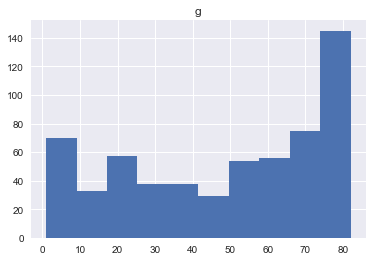

In [28]:
data[data['year'] == 2017].hist(column='g');